In [8]:
import pandas as pd

pitcher_df = pd.read_csv("data_scraping/pitchers_data.csv")

/var/folders/dg/x_0nm1fs4813040r8nczfsfm0000gn/T/ipykernel_33741/1282951302.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  pitcher_df = pd.read_csv("data_scraping/pitchers_data.csv")


In [9]:
pitcher_df

Unnamed: 0  Position             Name  dk_points dk_salary Team  \
0                1         1  Felix Hernandez      35.35   $11,000  SEA   
1                2         1    Clay Buchholz      35.35    $6,900  BOS   
2                3         1     Johnny Cueto      32.75    $9,600  CIN   
3                4         1      David Price      30.50   $10,400  DET   
4                5         1     Max Scherzer      29.65   $11,500  WAS   
...            ...       ...              ...        ...       ...  ...   
127790      127791         1     Corey Knebel       5.65    $4,000  LAD   
127791      127792         1    Kenley Jansen       5.05    $4,000  LAD   
127792      127793         1    Blake Treinen       2.75    $4,000  LAD   
127793      127794         1       Alex Vesia      -1.80    $4,000  LAD   
127794      127795         1     Luke Jackson      -3.80    $4,000  ATL   

          Opp Score                Stats_Summary  day  ...  game_2_dh  \
0       v laa   4-1  7.0IP 2H R ER BB 10K HB Win    6  ...      False   
1       @ phi   8-0         7.0IP 3H BB 9K E Win    6  ...      False   
2       v pit   5-2              7.0IP 4H BB 10K    6  ...      False   
3       v min   4-0              8.2IP 5H 5K Win    6  ...      False   
4       v nym   1-3      7.2IP 4H 3R 2BB 8K Loss    6  ...      False   
...       ...   ...                          ...  ...  ...        ...   
127790  @ atl   2-4                   1.0IP H 2K   23  ...      False   
127791  @ atl   2-4                1.0IP H BB 2K   23  ...      False   
127792  @ atl   2-4                      0.1IP K   23  ...      False   
127793  @ atl   2-4                    0.0IP 3BB   23  ...      False   
127794  v lad   4-2             0.0IP 2H R ER BB   23  ...      False   

         game_pk  starter_throws avg_hit_distance  avg_launch_speed  \
0       413649.0               R       235.250000         90.866667   
1       413652.0               R       150.666667         87.392308   
2       413658.0               R       111.937500         88.462500   
3       413656.0               L       162.730769         91.733333   
4       413657.0               R       175.210526         85.159091   
...          ...             ...              ...               ...   
127790       NaN             NaN              NaN               NaN   
127791       NaN             NaN              NaN               NaN   
127792       NaN             NaN              NaN               NaN   
127793       NaN             NaN              NaN               NaN   
127794       NaN             NaN              NaN               NaN   

       avg_launch_angle  estimated_ba_using_speedangle  \
0             23.500000                       0.288500   
1             10.923077                       0.375727   
2              4.750000                       0.358571   
3             14.370370                       0.333083   
4             18.454545                       0.224048   
...                 ...                            ...   
127790              NaN                            NaN   
127791              NaN                            NaN   
127792              NaN                            NaN   
127793              NaN                            NaN   
127794              NaN                            NaN   

        estimated_woba_using_speedangle  total_delta_home_win_exp  \
0                              0.550000                     0.254   
1                              0.380909                    -0.324   
2                              0.339500                     0.403   
3                              0.359583                     0.327   
4                              0.249952                    -0.089   
...                                 ...                       ...   
127790                              NaN                       NaN   
127791                              NaN                       NaN   
127792                              NaN                    

In [10]:
def is_home_team(match):
    if match.startswith('v'):
        return True
    elif match.startswith('@'):
        return False
    else:
        return None

pitcher_df.drop(['Unnamed: 0'], axis=1, inplace=True)
pitcher_df.drop(['day'], axis=1, inplace=True)
pitcher_df.drop(['month'], axis=1, inplace=True)
pitcher_df.drop(['game_pk'], axis=1, inplace=True)
pitcher_df.drop(['Stats_Summary'], axis=1, inplace=True)
pitcher_df.drop(['game_2_dh'], axis=1, inplace=True)
pitcher_df['home_team'] = pitcher_df['Opp'].apply(is_home_team)
pitcher_df['dk_salary'] = pitcher_df['dk_salary'].str.replace('$', '').str.replace(',', '').astype(float)
pitcher_df['fd_salary'] = pitcher_df['fd_salary'].str.replace('$', '').str.replace(',', '').astype(float)
pitcher_df['yh_salary'] = pitcher_df['yh_salary'].str.replace('$', '').str.replace(',', '').astype(float)

In [11]:
def extract_team(value):
    return value.split('(')[0].strip()
pitcher_df['Opp'] = pitcher_df['Opp'].str.replace('@', '').str.replace('v', '')
pitcher_df['Opp'] = pitcher_df['Opp'].apply(extract_team)
pitcher_df['Opp'] = pitcher_df['Opp'].apply(lambda x: x.upper())

In [12]:
pitcher_df

Position             Name  dk_points  dk_salary Team  Opp Score  year  \
0              1  Felix Hernandez      35.35    11000.0  SEA  LAA   4-1  2015   
1              1    Clay Buchholz      35.35     6900.0  BOS  PHI   8-0  2015   
2              1     Johnny Cueto      32.75     9600.0  CIN  PIT   5-2  2015   
3              1      David Price      30.50    10400.0  DET  MIN   4-0  2015   
4              1     Max Scherzer      29.65    11500.0  WAS  NYM   1-3  2015   
...          ...              ...        ...        ...  ...  ...   ...   ...   
127790         1     Corey Knebel       5.65     4000.0  LAD  ATL   2-4  2021   
127791         1    Kenley Jansen       5.05     4000.0  LAD  ATL   2-4  2021   
127792         1    Blake Treinen       2.75     4000.0  LAD  ATL   2-4  2021   
127793         1       Alex Vesia      -1.80     4000.0  LAD  ATL   2-4  2021   
127794         1     Luke Jackson      -3.80     4000.0  ATL  LAD   4-2  2021   

        fd_points  fd_salary  ...   game_date  starter_throws  \
0            20.0    11200.0  ...  2015-04-06               R   
1            20.0     7300.0  ...  2015-04-06               R   
2            17.0    10500.0  ...  2015-04-06               R   
3            17.7    10600.0  ...  2015-04-06               L   
4            15.7    11000.0  ...  2015-04-06               R   
...           ...        ...  ...         ...             ...   
127790        NaN        NaN  ...  2021-10-23             NaN   
127791        NaN        NaN  ...  2021-10-23             NaN   
127792        NaN        NaN  ...  2021-10-23             NaN   
127793        NaN        NaN  ...  2021-10-23             NaN   
127794        NaN        NaN  ...  2021-10-23             NaN   

        avg_hit_distance  avg_launch_speed  avg_launch_angle  \
0             235.250000         90.866667         23.500000   
1             150.666667         87.392308         10.923077   
2             111.937500         88.462500          4.750000   
3             162.730769         91.733333         14.370370   
4             175.210526         85.159091         18.454545   
...                  ...               ...               ...   
127790               NaN               NaN               NaN   
127791               NaN               NaN               NaN   
127792               NaN               NaN               NaN   
127793               NaN               NaN               NaN   
127794               NaN               NaN               NaN   

        estimated_ba_using_speedangle  estimated_woba_using_speedangle  \
0                            0.288500                         0.550000   
1                            0.375727                         0.380909   
2                            0.358571                         0.339500   
3                            0.333083                         0.359583   
4                            0.224048                         0.249952   
...                               ...                              ...   
127790                            NaN                              NaN   
127791                            NaN                              NaN   
127792                            NaN                              NaN   
127793                            NaN                              NaN   
127794                            NaN                              NaN   

        total_delta_home_win_exp  total_delta_run_exp  home_team  
0                          0.254               -2.154       True  
1                         -0.324               -3.133      False  
2                          0.403               -3.517       True  
3                          0.327               -3.483       True  
4                         -0.089               -0.159       True  
...                          ...                  ...        ...  
127790                       NaN                  NaN      False  
127791                       NaN                  NaN      F

## Add Day of Season Number

In [7]:
def add_date_num(df):
    date_df = df[['game_date', 'year']]
    date_df = date_df.drop_duplicates()
    date_df['day_num'] = date_df.groupby(['year']).cumcount() + 1
    
    return pd.merge(df, date_df.drop(['year'], axis=1), on='game_date', how='left')

pitcher_df = add_date_num(pitcher_df)

In [20]:
import matplotlib.pyplot as plt

def plot_long_data(plt_label, column_name, df, groups=None, legend_title="Year"):
    if groups is None:
        groups = ['day_num', 'year']
    grouped_df = df.groupby(groups)[column_name].mean().unstack()
    plt.figure(figsize=(10, 6))
    for column in grouped_df.columns:
        plt.plot(grouped_df.index, grouped_df[column], label=str(column))

    plt.xlabel('Day Number')
    plt.ylabel(plt_label) 
    plt.title(plt_label)
    plt.legend(title=legend_title, loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
def plot_long_data_company(df, company, plot_label, column_name, groups=None, legend_title='Year'):
    new_df = df.copy()
    new_df[company + '_salary_lagged'] = new_df.groupby(['Name', 'year'])[company + '_salary'].shift(1)
    if (company != 'fd'):
        new_df.drop(['fd_points', 'fd_salary'], axis=1, inplace=True)
    if (company != 'yh'):
       new_df.drop(['yh_points', 'yh_salary'], axis=1, inplace=True) 
    if (company != 'dk'):
       new_df.drop(['dk_points', 'dk_salary'], axis=1, inplace=True) 
        
    plot_long_data(plot_label, column_name, df, groups, legend_title)

## Salary Visualizations By Year

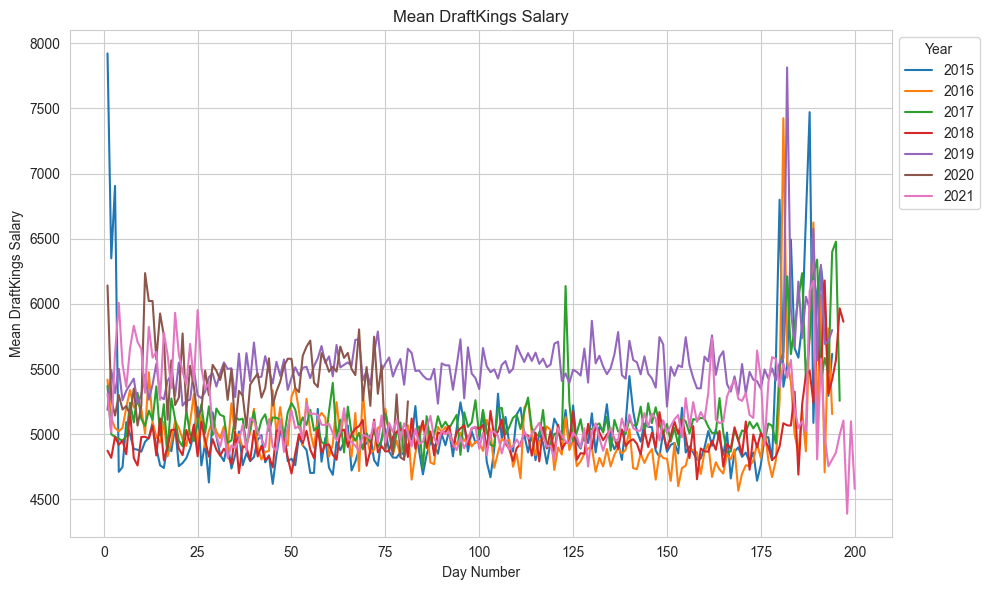

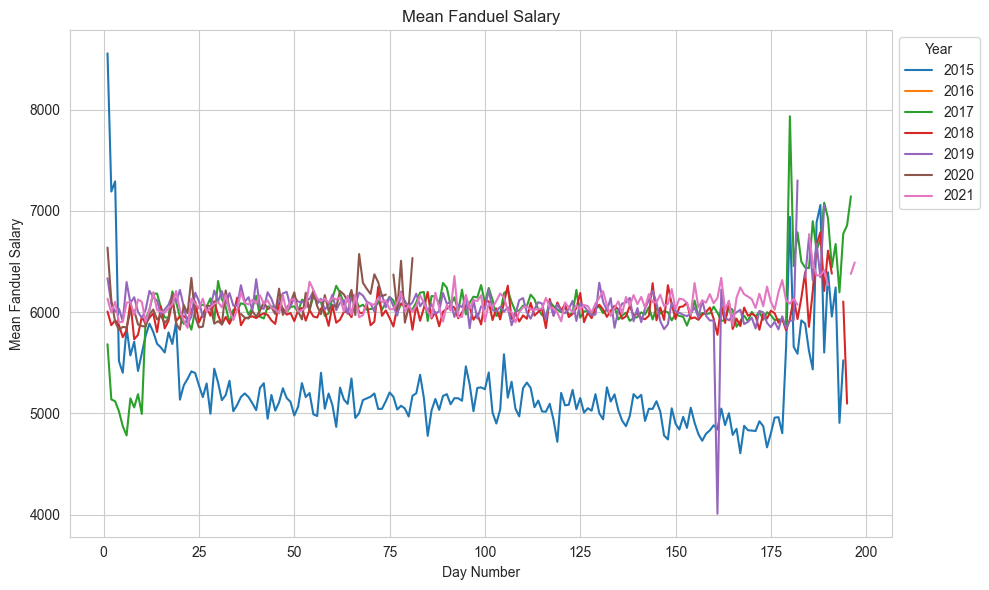

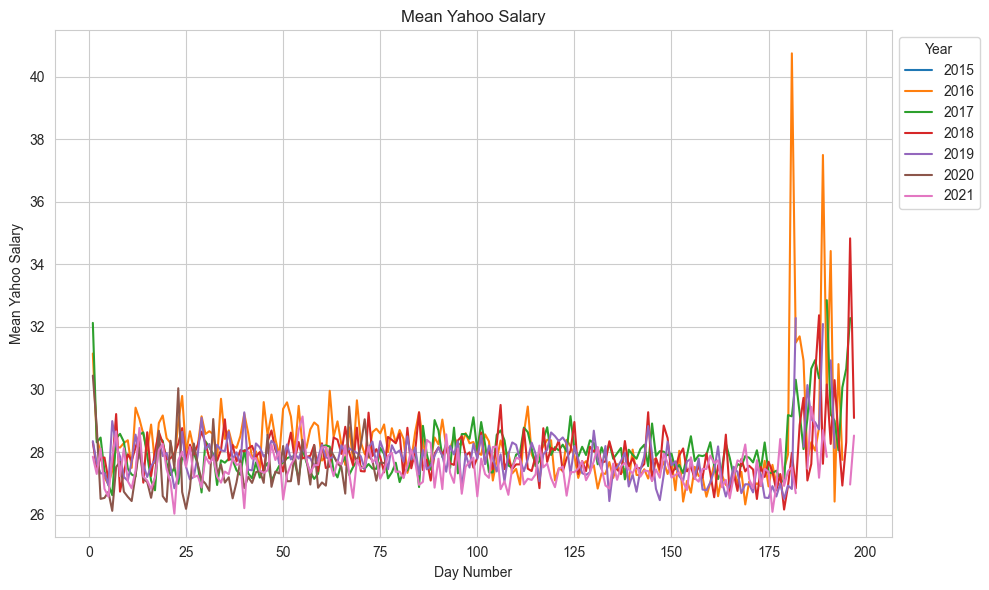

In [12]:
plot_long_data_company(pitcher_df, "dk", 'Mean DraftKings Salary', 'dk_salary')
plot_long_data_company(pitcher_df, 'fd', 'Mean Fanduel Salary', 'fd_salary')
plot_long_data_company(pitcher_df, 'yh', 'Mean Yahoo Salary', 'yh_salary')

## Score Visualizations by Year

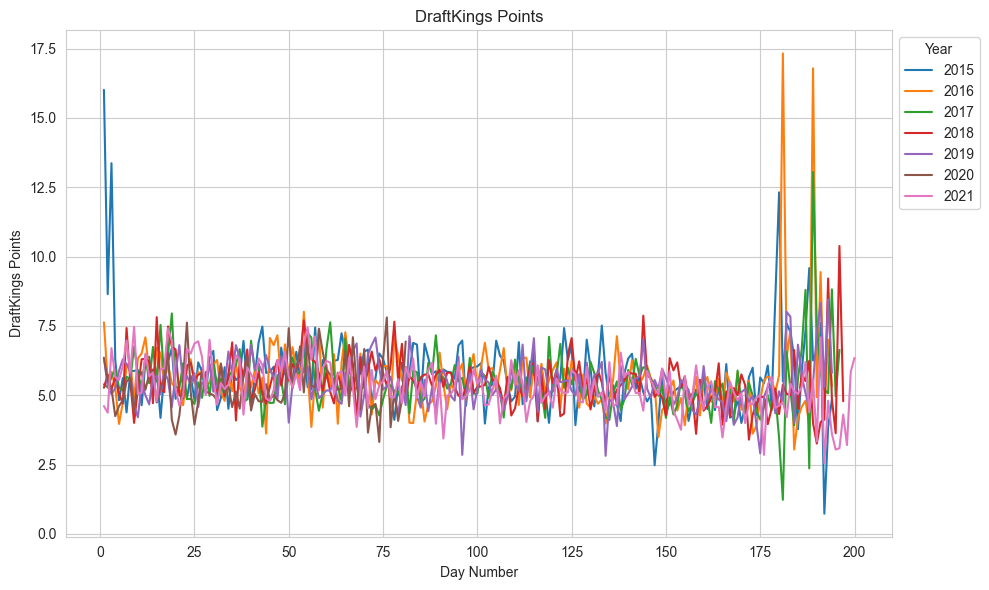

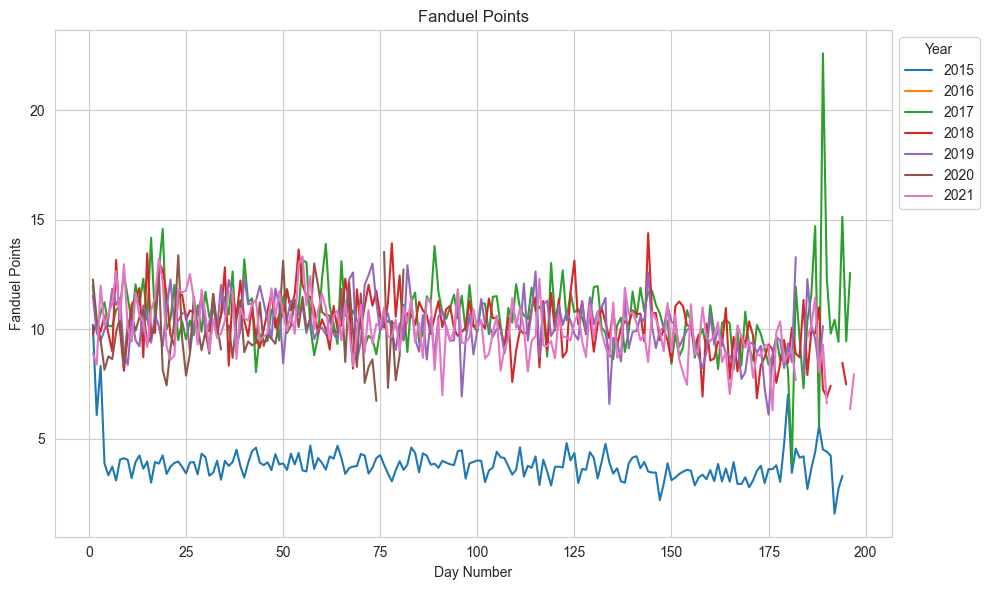

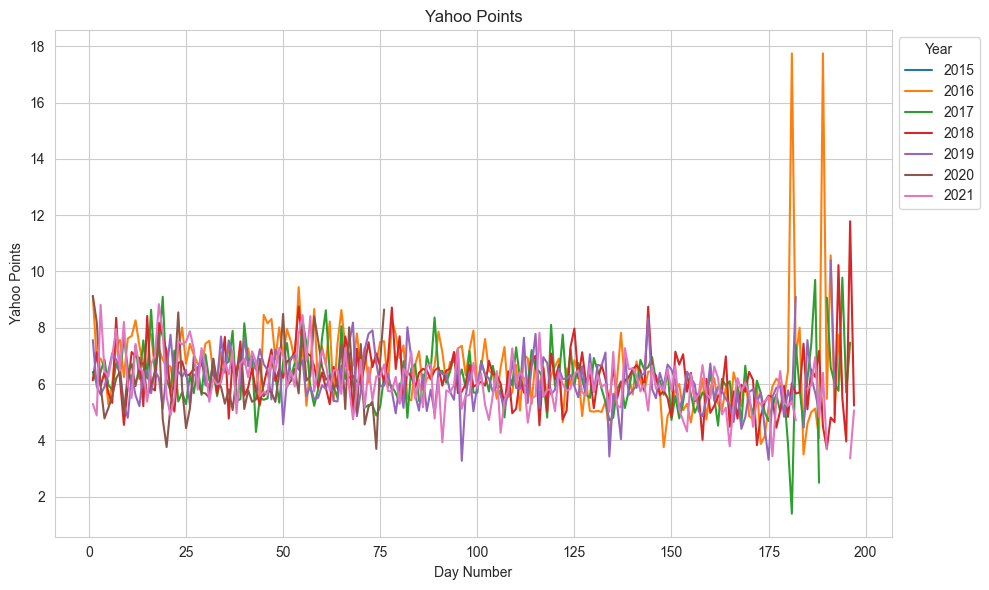

In [13]:
plot_long_data_company(pitcher_df, "dk", 'DraftKings Points', 'dk_points')
plot_long_data_company(pitcher_df, 'fd', 'Fanduel Points', 'fd_points')
plot_long_data_company(pitcher_df, 'yh', 'Yahoo Points', 'yh_points')

##  Plotting Salary By Position

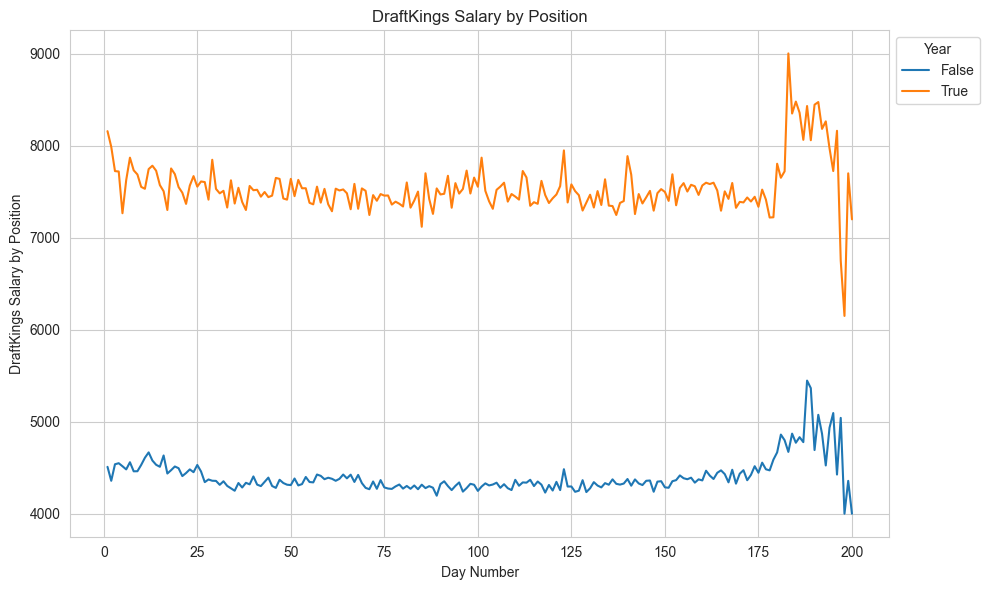

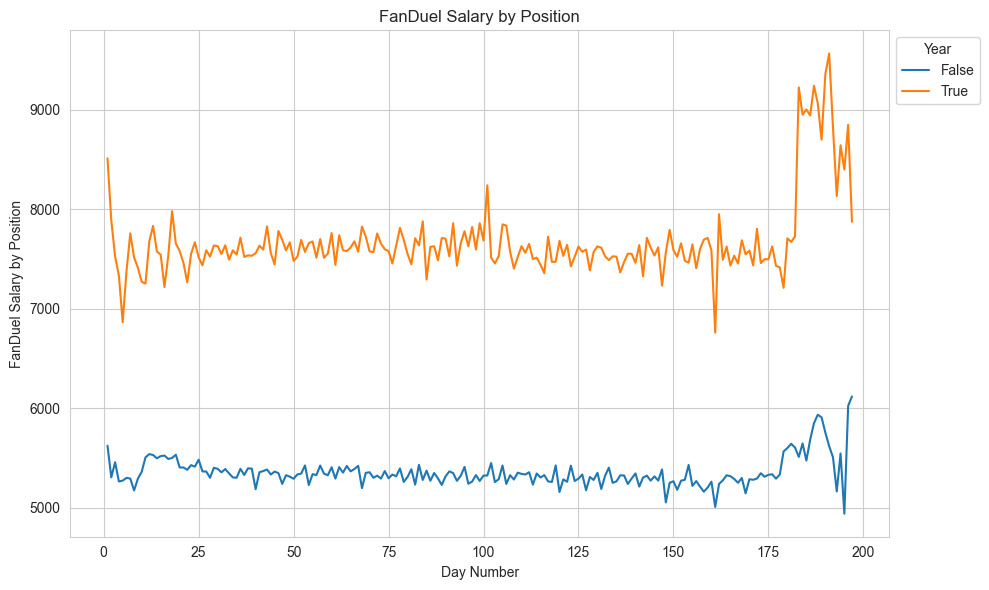

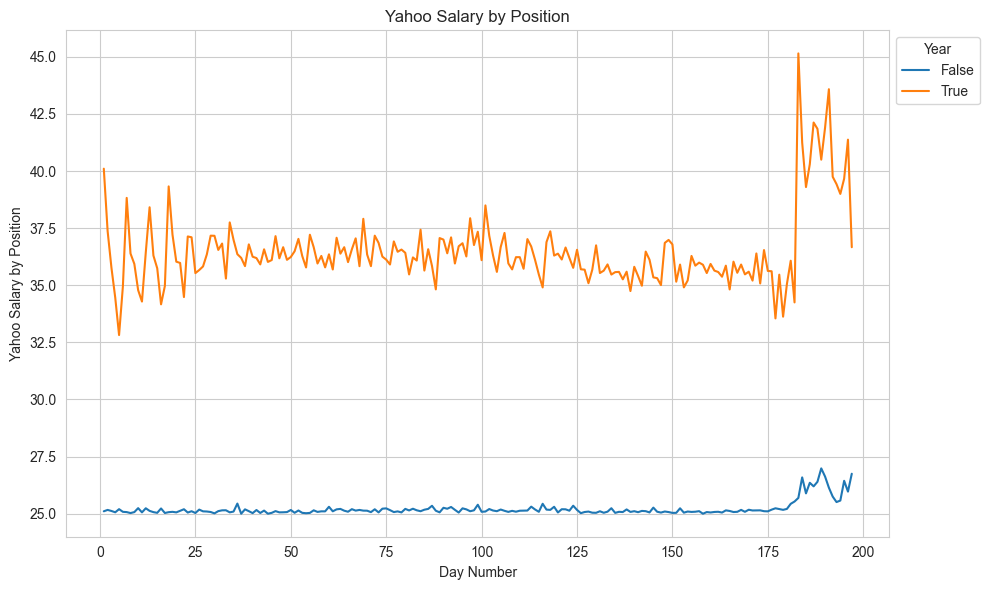

In [15]:
plot_long_data_company(pitcher_df, "dk", 'DraftKings Salary by Position', 'dk_salary', ["day_num", 'starter'])
plot_long_data_company(pitcher_df, "fd", 'FanDuel Salary by Position', 'fd_salary', ["day_num", 'starter'])
plot_long_data_company(pitcher_df, "yh", 'Yahoo Salary by Position', 'yh_salary', ["day_num", 'starter'])

##  Plotting Salary By Position

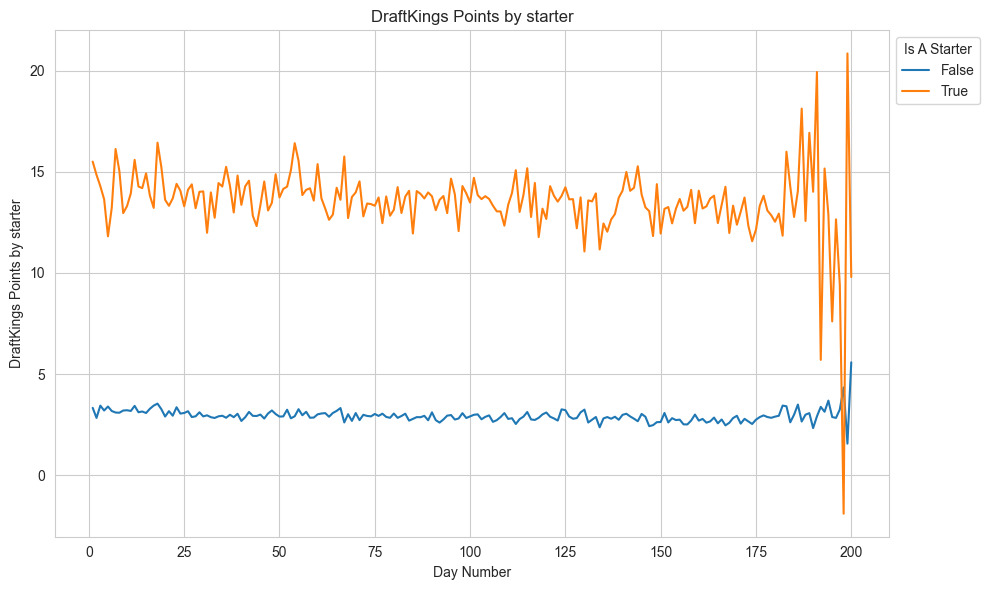

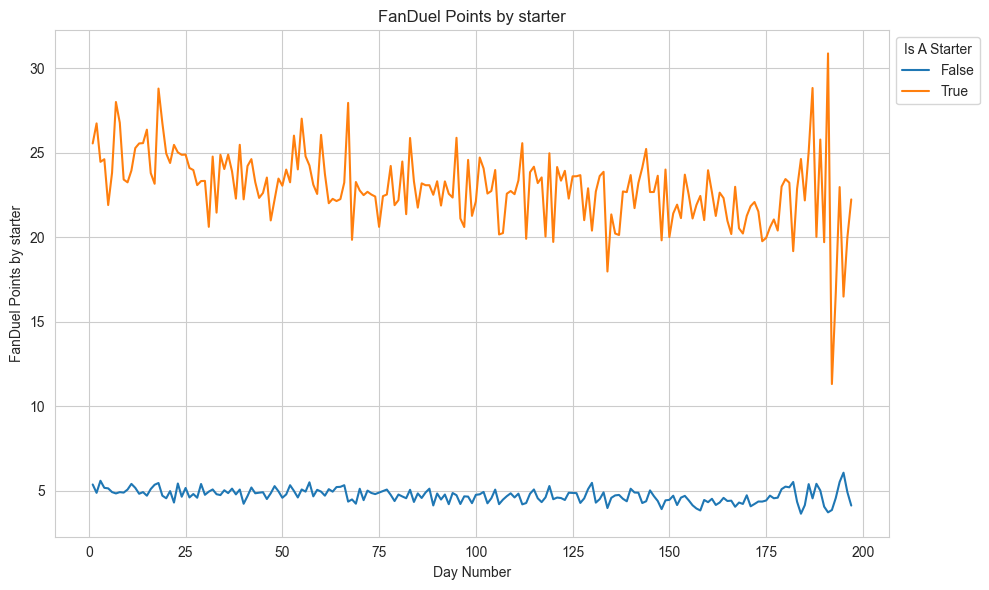

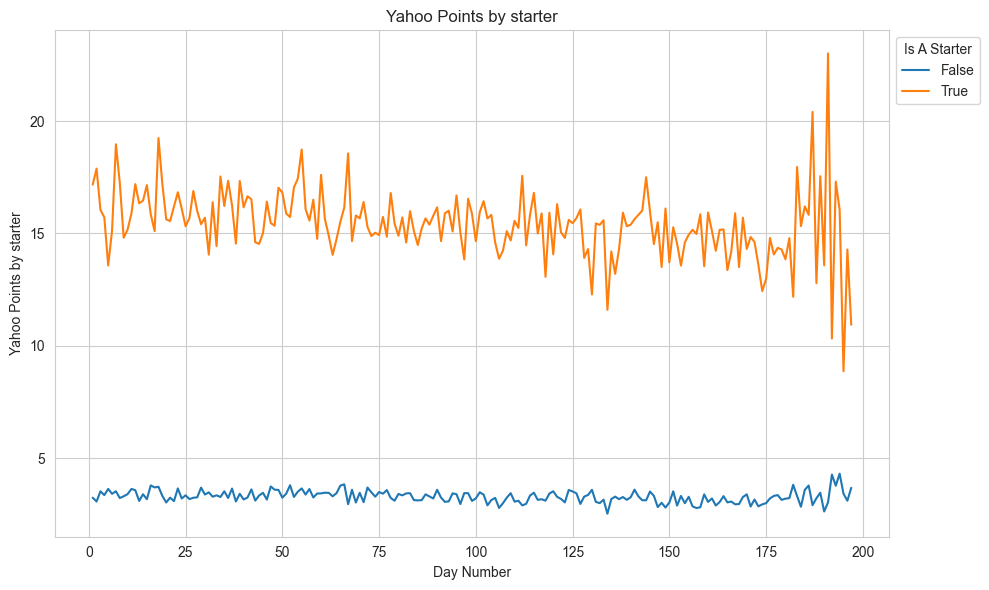

In [21]:
plot_long_data_company(pitcher_df, "dk", 'DraftKings Points by starter', 'dk_points', ["day_num", 'starter'], "Is A Starter")
plot_long_data_company(pitcher_df, "fd", 'FanDuel Points by starter', 'fd_points', ["day_num", 'starter'], "Is A Starter")
plot_long_data_company(pitcher_df, "yh", 'Yahoo Points by starter', 'yh_points', ["day_num", 'starter'], "Is A Starter")

# Predicting Player Salary

## Create Train, Test, and Validation sets

In [22]:
valid_df = pitcher_df.copy()[pitcher_df['year'] == 2021]
test_df = pitcher_df.copy()[pitcher_df['year'] == 2020]
train_df = pitcher_df.copy()[pitcher_df['year'] != 2021]
train_df = train_df[train_df['year'] != 2020]

## More Feature Engineering to get data prepped for GLM

In [26]:
import numpy as np

def take_care_of_na(df):
    df['avg_hit_distance'].fillna(df['avg_hit_distance'].mean(), inplace=True)
    df['avg_launch_speed'].fillna(df['avg_launch_speed'].mean(), inplace=True) 
    df['avg_launch_angle'].fillna(df['avg_launch_angle'].mean(), inplace=True)
    df['estimated_ba_using_speedangle'].fillna(df['estimated_ba_using_speedangle'].mean(),
                                               inplace=True)
    df['estimated_woba_using_speedangle'].fillna(df['estimated_woba_using_speedangle'].mean(),
                                                 inplace=True)    

def add_date_info(df):
    df['game_date'] = pd.to_datetime(df['game_date'])
    df['day_of_week'] = df['game_date'].dt.dayofweek
    df['angular_date'] = 2 * np.pi * df['day_of_week'] / 7
    
def add_lagged_info(df, lagged_column, lags, group):
    for lag in range(1, lags + 1):
        df[lagged_column + "_lagged_" + str(lag)] = df.groupby(group)[lagged_column].shift(lag)
    df[lagged_column + "_next"] = df.groupby(group)[lagged_column].shift(-1)
    df.dropna(subset=[lagged_column + "_lagged_" + str(lags)], inplace=True)
    df.dropna(subset=[lagged_column + "_next"], inplace=True)
    
def clean_for_lms(df, lagged_column, lags, group):
    take_care_of_na(df)
    add_date_info(df)
    add_lagged_info(df, lagged_column, lags, group)

In [27]:
clean_for_lms(train_df, 'dk_salary', 5, ['Name', 'year'])
clean_for_lms(test_df, 'dk_salary', 5, ['Name', 'year'])
clean_for_lms(valid_df, 'dk_salary', 5, ['Name', 'year'])

## EDA

In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80547 entries, 928 to 100634
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Position                         80547 non-null  int64         
 1   Name                             80547 non-null  object        
 2   dk_points                        80547 non-null  float64       
 3   dk_salary                        80547 non-null  float64       
 4   Team                             80547 non-null  object        
 5   Opp                              80547 non-null  object        
 6   Score                            80547 non-null  object        
 7   year                             80547 non-null  int64         
 8   fd_points                        62807 non-null  float64       
 9   fd_salary                        62806 non-null  float64       
 10  yh_points                        64173 non-null  float64    

In [29]:
vis_df = train_df[['starter', 'dk_points', 'dk_salary', 'year', 'dk_salary_lagged_1', 
          'dk_salary_lagged_2', 'dk_salary_lagged_3', 'dk_salary_lagged_4', 'dk_salary_lagged_5',
          'dk_salary_next']]

vis_df.corr(numeric_only=True)['dk_salary_next']

starter               0.736782
dk_points             0.615612
dk_salary             0.963178
year                  0.083727
dk_salary_lagged_1    0.951531
dk_salary_lagged_2    0.941921
dk_salary_lagged_3    0.935368
dk_salary_lagged_4    0.929406
dk_salary_lagged_5    0.923228
dk_salary_next        1.000000
Name: dk_salary_next, dtype: float64

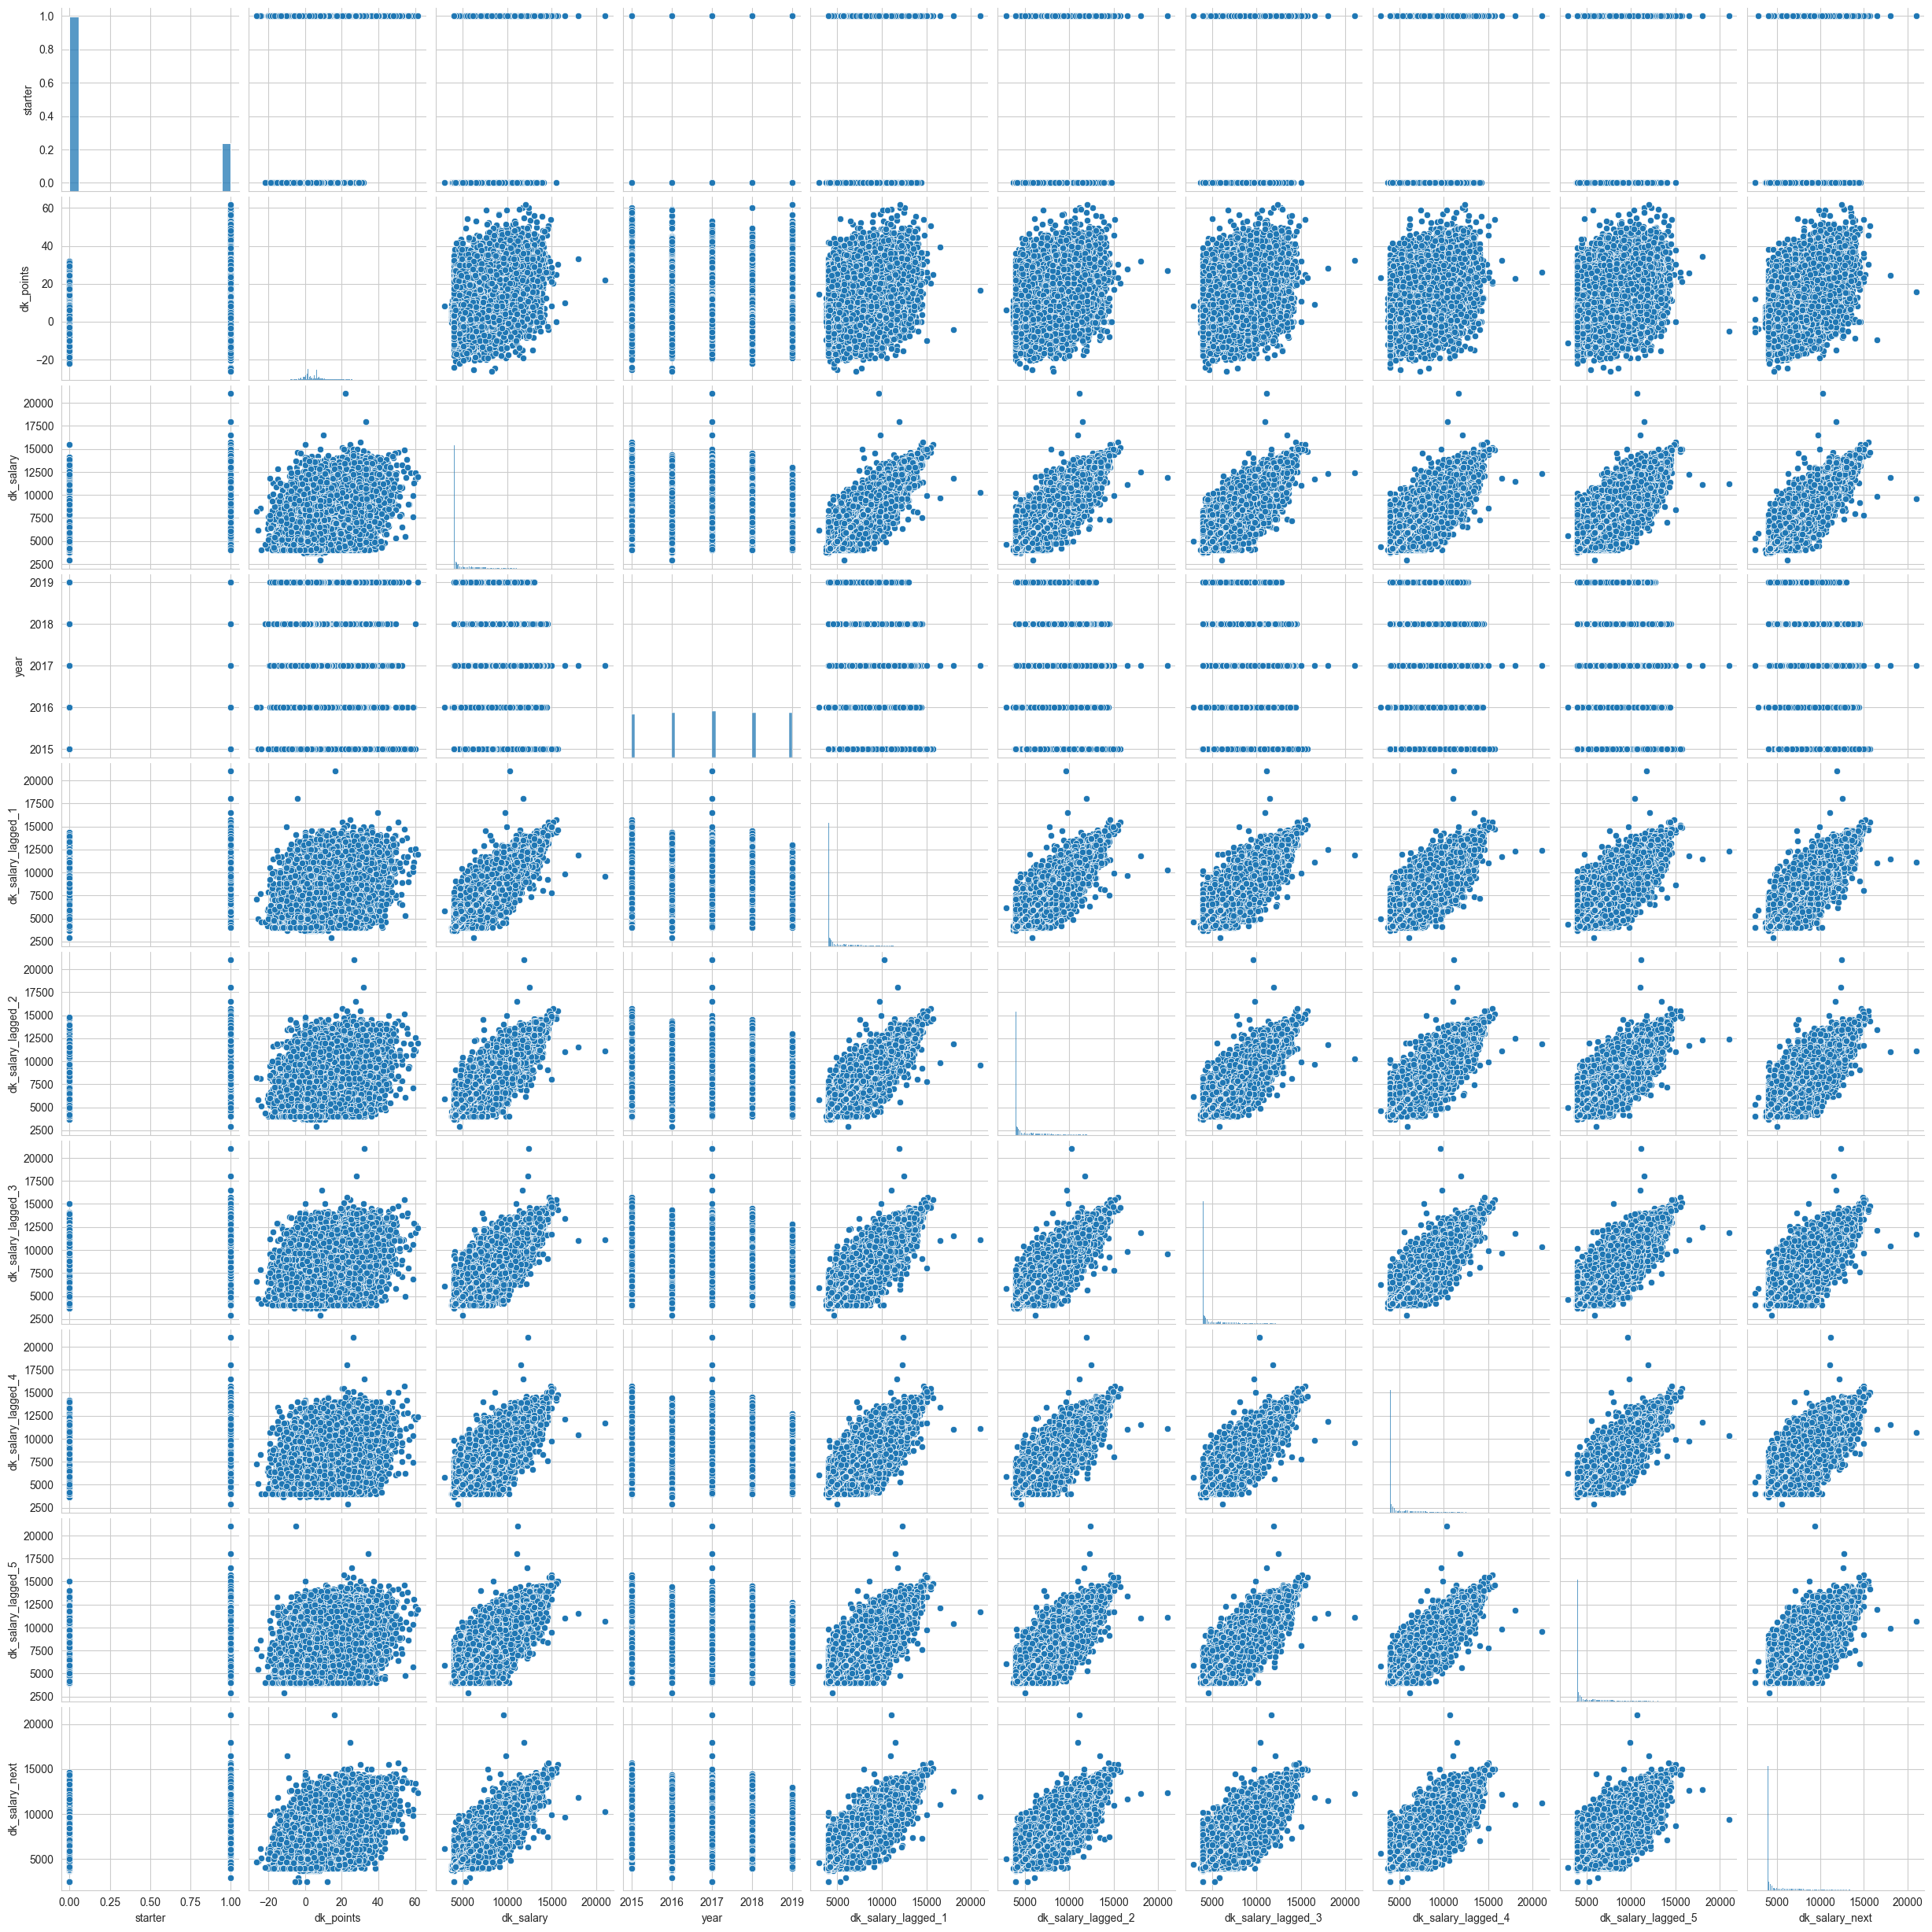

In [30]:
import seaborn as sns

sns.pairplot(vis_df)

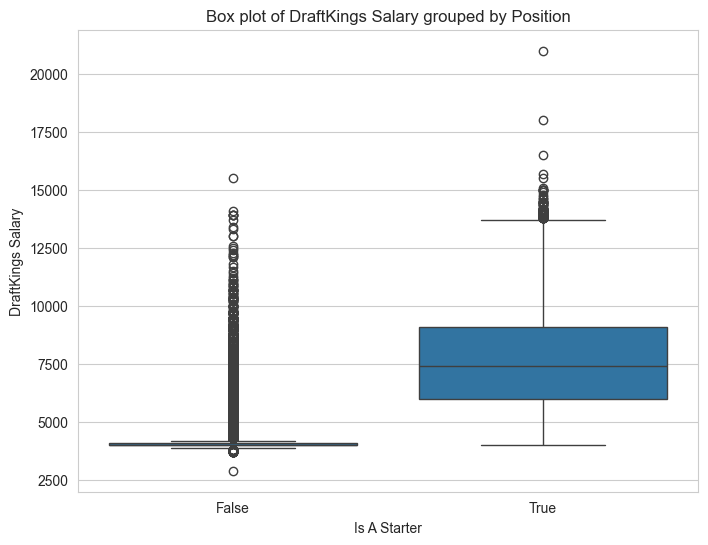

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='starter', y='dk_salary', data=train_df)
plt.title('Box plot of DraftKings Salary grouped by Position')
plt.xlabel('Is A Starter')
plt.ylabel('DraftKings Salary')
plt.show()

## Fitting Linear Model

### Model Fitting Functions

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import mean_squared_error
from scipy.stats import chi2

### Plot Helper Functions

In [33]:
def plot_qq(residuals):
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot(residuals, line='s', ax=ax)
    plt.title("QQ Plot of Residuals")
    plt.show() 
    
def plot_acf_pacf(residuals):
    plot_acf(residuals, lags=40)  # Adjust the number of lags as needed
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title('Autocorrelation Function (ACF) of Residuals')
    plt.show()

    plot_pacf(residuals, lags=40)  # Adjust the number of lags as needed
    plt.xlabel('Lag')
    plt.ylabel('Partial Autocorrelation')
    plt.title('Partial Autocorrelation Function (PACF) of Residuals')
    plt.show() 
    
def plot_resids_over_time(residuals, df, ylab):
    mod_df = df.copy()[['year', 'day_num', 'Position']]
    mod_df['resid'] = residuals 

    grouped_df = mod_df.groupby(['day_num','Position'])['resid'].mean().unstack()

    plt.figure(figsize=(10, 6))
    for column in grouped_df.columns:
        plt.plot(grouped_df.index, grouped_df[column], label=str(column))

    plt.xlabel('Day Number')
    plt.ylabel('Resid ' + ylab) 
    plt.title('Resid ' + ylab + ' for Each Day by Position')
    plt.legend(title='Position', loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show() 

def plot_me_residuals(residuals, df, ylab):
    plot_qq(residuals)
    plot_resids_over_time(residuals, df, ylab)
    
def get_mse_and_rmse(df, model_result, outcome_name):
    actual = df[outcome_name]
    pred = model_result.predict(df)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    
    return mse, rmse
    
def evaluate_me_model(model_result, df, ylab):
    print(model_result.summary())
    for group, effect in model_result.random_effects.items():
        print(f"Group: {group}, Random Effect: {effect}")
    plot_me_residuals(model_result.resid, df, ylab)

def lrt(mod1_result, mod2_result, dif):
    llf_diff = mod1_result.llf - mod2_result.llf

    test_stat = -2 * llf_diff
    p_value = 1 - chi2.cdf(test_stat, dif)

    print("Likelihood Ratio Test (LRT) Results:")
    print("Test statistic:", test_stat)
    print("P-value:", p_value) 
    
    
def print_rmse_by_pos(df, pred, pred_column):
    df = df.copy()
    df['pred'] = pred 
    rmse_by_pos = df.groupby('Position').apply(lambda x: np.sqrt(mean_squared_error(x[pred_column], x['pred'])))
    print("RMSE by Position:")
    for position, rmse in rmse_by_pos.items():
        print(f"{position}: {rmse}") 

## Linear Regression

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
scores_mod_1 = cross_val_score(lm, 
                               train_df.copy()[['dk_points']], 
                               train_df.dk_salary_next,
                               cv=5,
                               scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores_mod_1)
print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

RMSE scores for each fold: [1383.23802992 1457.00021866 1437.87601018 1427.10346612 1668.18983658]
Mean RMSE: 1474.6815122924763


In [35]:
lm = LinearRegression()
columns = ['dk_points', 'avg_hit_distance', 'avg_launch_speed', 'avg_launch_angle',
           'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'angular_date', 'dk_salary_lagged_1', 'dk_salary_lagged_2', 'dk_salary_lagged_3', 'dk_salary_lagged_4', 'dk_salary_lagged_5', 'dk_salary', 'starter']
scores_mod_1 = cross_val_score(lm, 
                               train_df.copy()[columns], 
                               train_df.dk_salary_next,
                               cv=5,
                               scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores_mod_1)
print("Training RMSE scores for each fold:", rmse_scores)
print("Trainng Mean RMSE:", np.mean(rmse_scores))

Training RMSE scores for each fold: [329.81477134 496.58036033 482.16548327 448.04998714 413.87802232]
Trainng Mean RMSE: 434.09772488117125


In [36]:
from sklearn.model_selection import cross_val_predict
pred = cross_val_predict(lm, train_df.copy()[columns], train_df.dk_salary_next, cv=5)

In [38]:
pred

array([3903.55959829, 4151.8181903 , 4140.00242157, ..., 4016.21392746,
       4894.11608848, 4290.68675403])

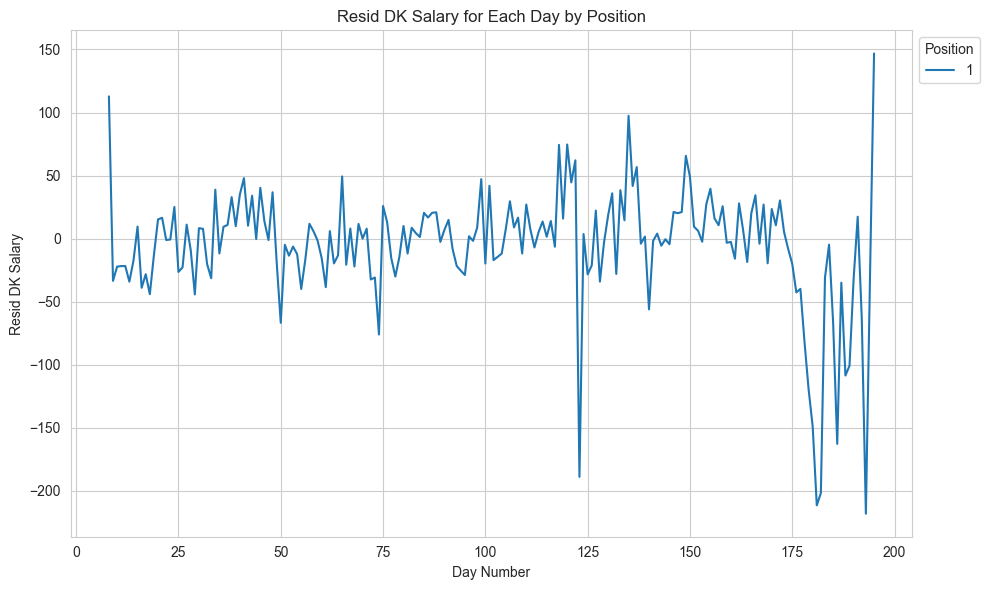

In [41]:
plot_resids_over_time(train_df["dk_salary_next"] - pred, train_df, "DK Salary")

## XGBoost

In [42]:
import xgboost as xgb

train_cols = ['dk_points', 'avg_hit_distance', 'avg_launch_speed',
                   'avg_launch_angle', 'estimated_ba_using_speedangle',
                   'estimated_woba_using_speedangle', 'angular_date', 'dk_salary_lagged_1',
                   'dk_salary_lagged_2', 'dk_salary_lagged_3', 'dk_salary_lagged_4',
                   'dk_salary_lagged_5', 'starter', 'dk_salary']

train_x = train_df[train_cols]

train_y = train_df[['dk_salary_next']]

test_x = test_df[train_cols]

test_y = test_df[['dk_salary_next']]

dtrain_reg = xgb.DMatrix(train_x, train_y, enable_categorical=True)
dtest_reg = xgb.DMatrix(test_x, test_y, enable_categorical=True)

In [43]:
params = {'objective': 'reg:squarederror'}
n = 100

model_points = xgb.train(
    dtrain=dtrain_reg,
    params=params,
    num_boost_round=n
)

pred = model_points.predict(dtest_reg)
np.sqrt(mean_squared_error(test_y, pred))

406.0095664876535

In [44]:
params = {'objective': 'reg:squarederror'}
n = 2600

# Add evals:
evals = [(dtrain_reg, 'train'), (dtest_reg, 'validation')]

model = xgb.train(
    dtrain=dtrain_reg,
    params=params,
    num_boost_round=n,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=10
)

[0]	train-rmse:1344.30940	validation-rmse:1174.58674
[10]	train-rmse:402.89110	validation-rmse:392.32029
[18]	train-rmse:389.99197	validation-rmse:401.02852


In [45]:
final_salary_model = model

# Predicting Player Score

In [46]:
clean_for_lms(train_df, 'dk_points', 5, ['Name', 'year'])
clean_for_lms(test_df, 'dk_points', 5, ['Name', 'year'])
clean_for_lms(valid_df, 'dk_points', 5, ['Name', 'year'])

## Linear Regression

In [47]:
lm = LinearRegression()
scores_mod_1 = cross_val_score(lm, 
                               train_df.copy()[['dk_salary']], 
                               train_df.dk_points_next,
                               cv=5,
                               scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores_mod_1)
print("RMSE scores for each fold:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))

RMSE scores for each fold: [6.11497745 6.35671378 6.31561542 6.11533724 6.77896974]
Mean RMSE: 6.336322724210912


In [48]:
lm = LinearRegression()
columns = ['dk_salary', 'dk_points', 'avg_hit_distance', 'avg_launch_speed', 'avg_launch_angle',
           'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle', 'angular_date', 'dk_points_lagged_2', 'dk_points_lagged_3', 'dk_points_lagged_4', 'dk_points_lagged_5',
           'dk_points_lagged_1', 'starter']
scores_mod_1 = cross_val_score(lm, 
                               train_df.copy()[columns], 
                               train_df.dk_points_next,
                               cv=5,
                               scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores_mod_1)
print("Training RMSE scores for each fold:", rmse_scores)
print("Trainng Mean RMSE:", np.mean(rmse_scores))

Training RMSE scores for each fold: [5.87443947 6.11334381 6.08565169 5.8703308  6.16399396]
Trainng Mean RMSE: 6.021551947023751


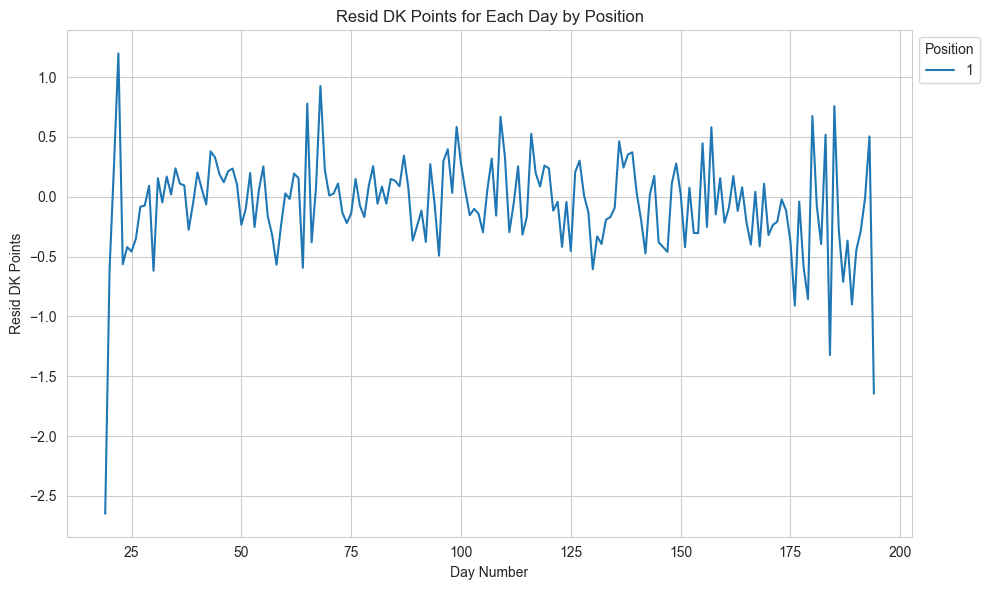

In [49]:
pred = cross_val_predict(lm, train_df.copy()[columns], train_df.dk_points_next, cv=5)
plot_resids_over_time(train_df['dk_points_next'] - pred, train_df, "DK Points")

In [50]:
import xgboost as xgb

var_cols = ['dk_points', 'avg_hit_distance', 'avg_launch_speed',
                   'avg_launch_angle', 'estimated_ba_using_speedangle',
                   'estimated_woba_using_speedangle', 'angular_date', 'dk_points_lagged_1',
                   'dk_points_lagged_2', 'dk_points_lagged_3', 'starter', 'dk_salary']

pred_cols = ['dk_points_next']

train_x_points = train_df[var_cols]
train_y_points = train_df[pred_cols]

test_x_points = test_df[var_cols]
test_y_points = test_df[pred_cols]

dtrain_reg_points = xgb.DMatrix(train_x_points, train_y_points, enable_categorical=True)
dtest_reg_points = xgb.DMatrix(test_x_points, test_y_points, enable_categorical=True)

In [51]:
params = {'objective': 'reg:squarederror'}
n = 100

model_points = xgb.train(
    dtrain=dtrain_reg_points,
    params=params,
    num_boost_round=n
)

pred = model_points.predict(dtest_reg_points)
np.sqrt(mean_squared_error(test_y_points, pred))

4.219278260872317

In [52]:
params = {'objective': 'reg:squarederror'}
n = 2600

# Add evals:
evals = [(dtrain_reg_points, 'train'), (dtest_reg_points, 'validation')]

model_points = xgb.train(
    dtrain=dtrain_reg_points,
    params=params,
    num_boost_round=n,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=10
)

[0]	train-rmse:6.82057	validation-rmse:4.51379
[10]	train-rmse:5.77125	validation-rmse:4.18384
[18]	train-rmse:5.65403	validation-rmse:4.17862


In [53]:
final_points_model = model_points

In [13]:
pitcher_df.to_csv('pitchers_df_cleaned.csv', index=False)

In [55]:
valid_df.to_csv('pitchers_valid_df.csv', index=False)